In [42]:
import numpy as np
import random
from numpy import mean


def RMSE(y,ycomp):
        errorRMSE = 0.0
        errorRMSE = mean(y - ycomp) ** 2
        errorRMSE = sqrt(errorRMSE)

class MyGDRegressor:
     def __init__(self, learning_rate: float = 0.001, no_epochs: int = 1000):
        super().__init__()
        self.learning_rate = learning_rate
        self.no_epochs = no_epochs

     def fit(self, x: list, y: list):
        self.coef_ = [random.random() for _ in range(len(x[0]) + 1)]
        for _ in range(self.no_epochs):
            errors = []
            for i in range(len(x)):
                y_computed = self.eval(x[i])
                #err = RMSE(y_computed, y[i])
                err = y_computed - y[i]
                errors.append(err)
            error = mean(errors)
            for i in range(len(x)):
                for j in range(0, len(x[0])):
                    self.coef_[j] = self.coef_[j] - self.learning_rate * error * x[i][j]
                    ##TODO w0 (redo)
                self.coef_[len(x[0])] = self.coef_[len(x[0])] - self.learning_rate * error * 1

        self.intercept_ = self.coef_[-1]
        self.coef_ = self.coef_[:-1]

     def eval(self, xi):
        yi = self.coef_[-1]
        for j in range(len(xi)):
            yi += self.coef_[j] * xi[j]
        return yi

     def predict(self, x: list):
        return [self.intercept_ + sum([self.coef_[i] * e[i] for i in range(len(e))]) for e in x]

in:   [1.61646318435669, 1.48238301277161, 1.480633020401, 1.56497955322266, 1.44357192516327]
out:  [7.53700017929077, 7.52199983596802, 7.50400018692017, 7.49399995803833, 7.4689998626709]


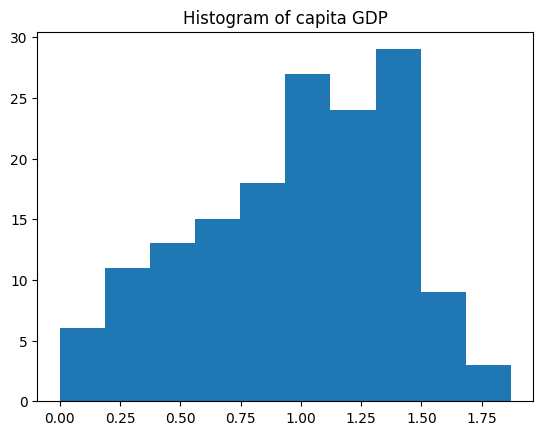

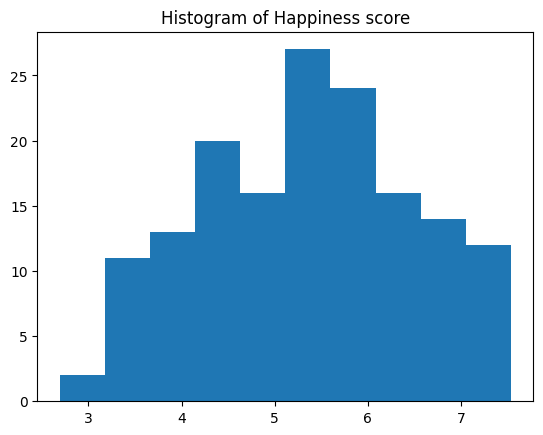

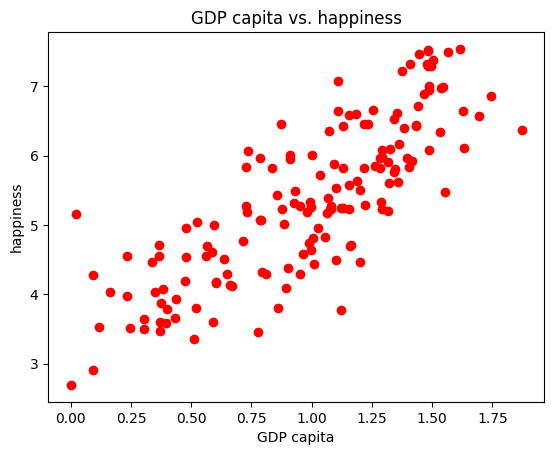

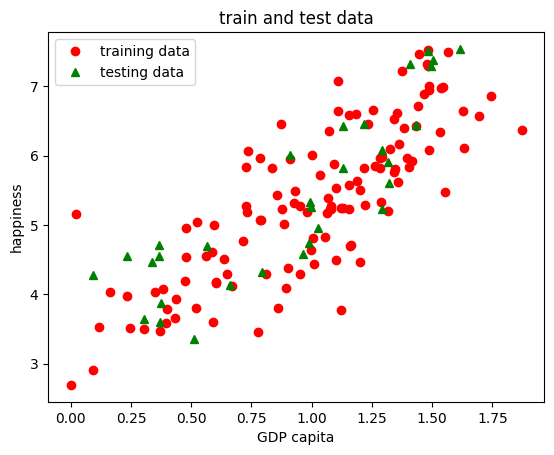

In [43]:
import warnings; warnings.simplefilter('ignore')
import csv
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.preprocessing import StandardScaler
from math import sqrt

def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable = dataNames.index(inputVariabName)
    inputs = [float(data[i][selectedVariable]) for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

import os

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'D:/FACULTATE/SEM4/AI/Lab6/GradulDeFericire', 'world-happiness-report-2017.csv')

inputs, outputs = loadData(filePath, 'Economy..GDP.per.Capita.', 'Happiness.Score')
print('in:  ', inputs[:5])
print('out: ', outputs[:5])

def plotDataHistogram(x, variableName):
    n, bins, patches = plt.hist(x, 10)
    plt.title('Histogram of ' + variableName)
    plt.show()

plotDataHistogram(inputs, "capita GDP")
plotDataHistogram(outputs, "Happiness score")

plt.plot(inputs, outputs, 'ro') 
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.title('GDP capita vs. happiness')
plt.show()

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]

testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')   #train data are plotted by red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'testing data')     #test data are plotted by green and a triangle sign
plt.title('train and test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

In [44]:
xx = [[el] for el in trainInputs]


# Inițializăm regresorul pentru gradientul descendent cu batch-uri
regressor = MyGDRegressor()

# Definim dimensiunea lotului
batch_size = 64

# Antrenăm modelul folosind gradientul descendent cu batch-uri
for i in range(0, len(trainInputs), 1):
    X_batch = xx[i:i+batch_size]  # Folosim xx, lista transformata, direct pentru a reduce timpul de prelucrare
    y_batch = trainOutputs[i:i+batch_size]
    regressor.fit(X_batch, y_batch)  # Folosim metoda fit a clasei MyBatchGDRegression

# Obținem parametrii modelului
w0, w1 = regressor.intercept_, regressor.coef_[0]

# Afișăm modelul învățat
print("SGD:   2.750859810931838  +  2.5537184851664714  * x")
print('GD - batch: f(x) = ', w0, ' + ', w1, ' * x' )

SGD:   2.750859810931838  +  2.5537184851664714  * x
GD - batch: f(x) =  2.4198408598171275  +  2.2375850484056596  * x


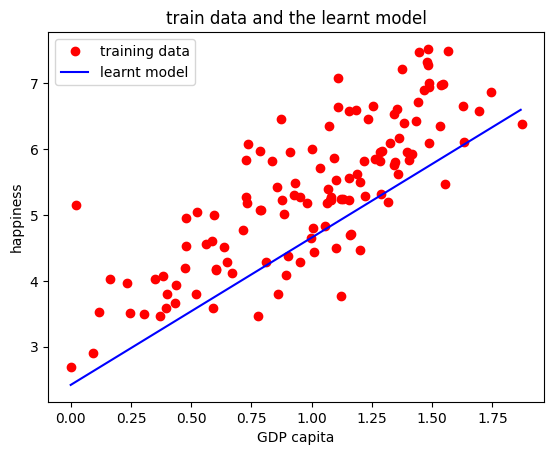

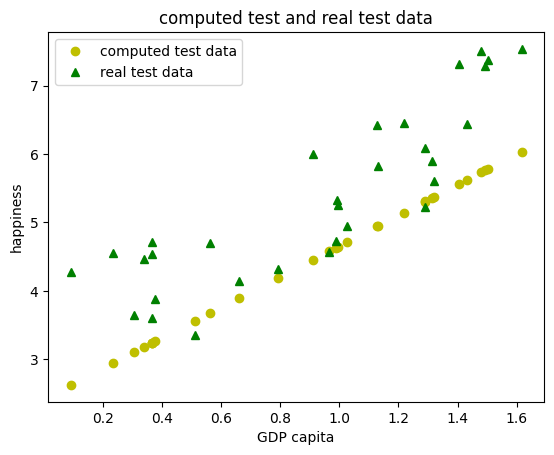

GD-tool
prediction error (manual):  0.461489143412949
prediction error (tool):   0.461489143412949
MyGDRegressor
prediction error (tool):   1.150216449427962
prediction error (manual):  1.150216449427962


In [45]:
noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')  #train data are plotted by red and circle sign
plt.plot(xref, yref, 'b-', label = 'learnt model')                  #model is plotted by a blue line
plt.title('train data and the learnt model')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

computedTestOutputs = regressor.predict([[x] for x in testInputs])

# plot the computed outputs (see how far they are from the real outputs)
plt.plot(testInputs, computedTestOutputs, 'yo', label = 'computed test data')  #computed test data are plotted yellow red and circle sign
plt.plot(testInputs, testOutputs, 'g^', label = 'real test data')  #real test data are plotted by green triangles
plt.title('computed test and real test data')
plt.xlabel('GDP capita')
plt.ylabel('happiness')
plt.legend()
plt.show()

error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)


# by using sklearn 
from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)
print("GD-tool")
print("prediction error (manual):  0.461489143412949")
print("prediction error (tool):   0.461489143412949")
print("MyGDRegressor")
print('prediction error (tool):  ', error)
print('prediction error (manual): ', error)

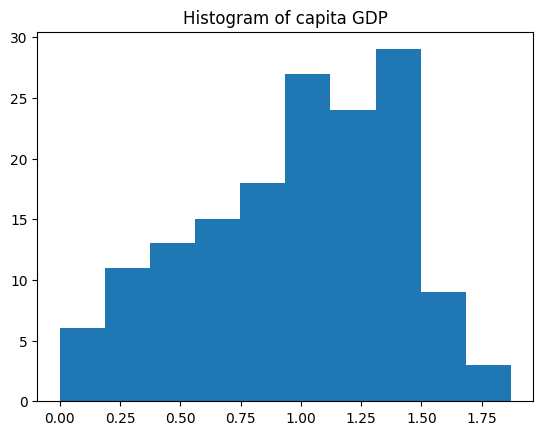

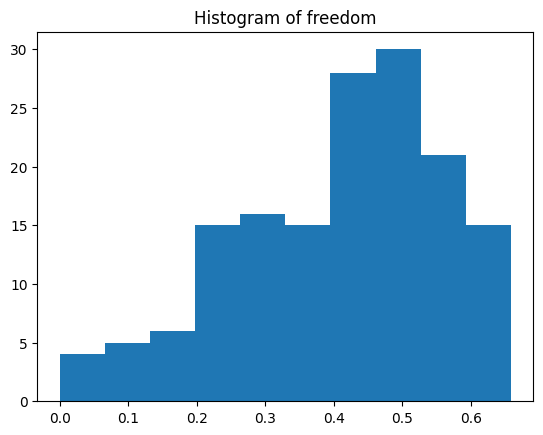

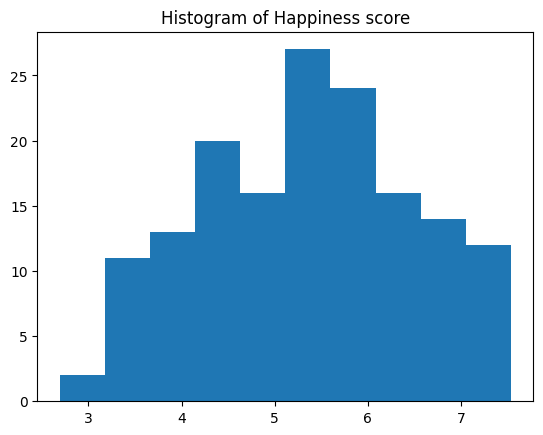

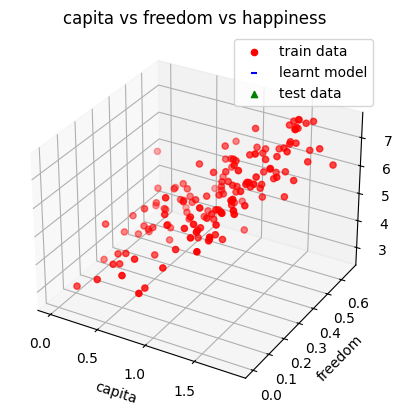

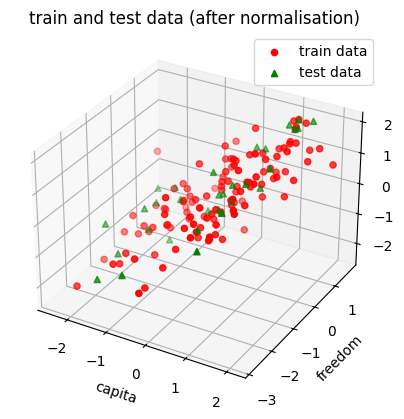

In [16]:
def loadDataMoreInputs(fileName, inputVariabNames, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
    selectedVariable1 = dataNames.index(inputVariabNames[0])
    selectedVariable2 = dataNames.index(inputVariabNames[1])
    inputs = [[float(data[i][selectedVariable1]), float(data[i][selectedVariable2])] for i in range(len(data))]
    selectedOutput = dataNames.index(outputVariabName)
    outputs = [float(data[i][selectedOutput]) for i in range(len(data))]
    
    return inputs, outputs

def plot3Ddata(x1Train, x2Train, yTrain, x1Model=None, x2Model=None, yModel=None, x1Test=None, x2Test=None, yTest=None, title=None):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    ax = plt.axes(projection='3d')
    
    if x1Train is not None:
        ax.scatter(x1Train, x2Train, yTrain, c='r', marker='o', label='train data')
    if x1Model is not None:
        ax.scatter(x1Model, x2Model, yModel, c='b', marker='_', label='learnt model')
    if x1Test is not None:
        ax.scatter(x1Test, x2Test, yTest, c='g', marker='^', label='test data')
    
    plt.title(title)
    ax.set_xlabel("capita")
    ax.set_ylabel("freedom")
    ax.set_zlabel("happiness")
    plt.legend()
    plt.show()

crtDir =  os.getcwd()
filePath = os.path.join(crtDir, 'D:\FACULTATE\SEM4\AI\Lab6\GradulDeFericire', 'world-happiness-report-2017.csv')

inputs, outputs = loadDataMoreInputs(filePath, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

feature1 = [ex[0] for ex in inputs]
feature2 = [ex[1] for ex in inputs]

# plot the data histograms
plotDataHistogram(feature1, 'capita GDP')
plotDataHistogram(feature2, 'freedom')
plotDataHistogram(outputs, 'Happiness score')

# check the liniarity (to check that a linear relationship exists between the dependent variable (y = happiness) and the independent variables (x1 = capita, x2 = freedom).)
plot3Ddata(feature1, feature2, outputs, [], [], [], [], [], [], 'capita vs freedom vs happiness')

def normalisation(trainData, testData):
    scaler = StandardScaler()
    if not isinstance(trainData[0], list):
        #encode each sample into a list
        trainData = [[d] for d in trainData]
        testData = [[d] for d in testData]
        
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
        
        #decode from list to raw values
        normalisedTrainData = [el[0] for el in normalisedTrainData]
        normalisedTestData = [el[0] for el in normalisedTestData]
    else:
        scaler.fit(trainData)  #  fit only on training data
        normalisedTrainData = scaler.transform(trainData) # apply same transformation to train data
        normalisedTestData = scaler.transform(testData)  # apply same transformation to test data
    return normalisedTrainData, normalisedTestData

np.random.seed(5)
indexes = [i for i in range(len(inputs))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs)), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]


trainInputs, testInputs = normalisation(trainInputs, testInputs)
trainOutputs, testOutputs = normalisation(trainOutputs, testOutputs)

feature1train = [ex[0] for ex in trainInputs]
feature2train = [ex[1] for ex in trainInputs]

feature1test = [ex[0] for ex in testInputs]
feature2test = [ex[1] for ex in testInputs]

plot3Ddata(feature1train, feature2train, trainOutputs, None, None, None, feature1test, feature2test, testOutputs, "train and test data (after normalisation)")

In [17]:
from sklearn import linear_model


# Inițializăm regresorul
regressor = MyGDRegressor()

# Definim dimensiunea lotului
batch_size = 64

# Antrenăm modelul folosind gradientul descendent cu batch-uri
for i in range(0, len(trainInputs), 1):
    X_batch = trainInputs[i:i+batch_size]
    y_batch = trainOutputs[i:i+batch_size]
    regressor.fit(X_batch, y_batch)

# Obținem parametrii modelului
w0, w1, w2 = regressor.intercept_, regressor.coef_[0], regressor.coef_[1]

# Afișăm modelul învățat
print("SGD: f(x) =  [-0.00185396]  +  0.671689108706825  * x1 +  0.3188107120116774  * x2")
print('GD - batch: f(x) = ', w0, ' + ', w1, ' * x1 + ', w2, ' * x2' )

SGD: f(x) =  [-0.00185396]  +  0.671689108706825  * x1 +  0.3188107120116774  * x2
GD - batch: f(x) =  0.4186608483147255  +  0.4436603658826302  * x1 +  0.6700125218215253  * x2


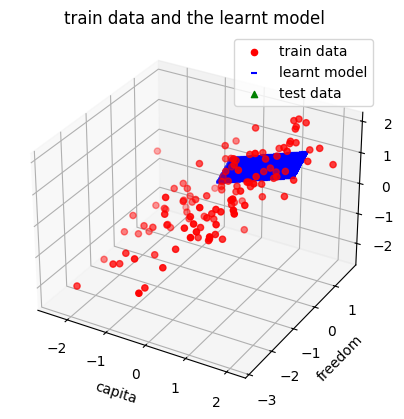

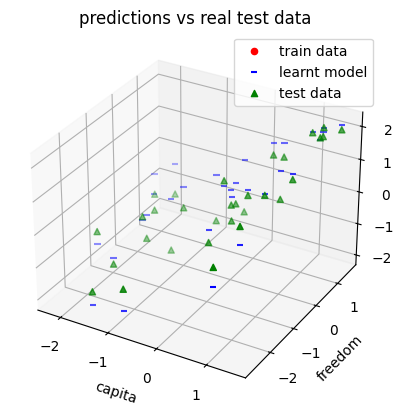

Gd - tool
prediction error (manual):  0.23971820267870023
prediction error (tool):    0.23971820267870023
GD-batch
prediction error (manual):  0.44437843742240474
prediction error (tool):    0.44437843742240474


In [18]:
noOfPoints = 50
xref1 = []
val = min(feature1)
step1 = (max(feature1) - min(feature1)) / noOfPoints
for _ in range(1, noOfPoints):
    for _ in range(1, noOfPoints):
        xref1.append(val)
    val += step1

xref2 = []
val = min(feature2)
step2 = (max(feature2) - min(feature2)) / noOfPoints
for _ in range(1, noOfPoints):
    aux = val
    for _ in range(1, noOfPoints):
        xref2.append(aux)
        aux += step2
yref = [w0 + w1 * el1 + w2 * el2 for el1, el2 in zip(xref1, xref2)]
plot3Ddata(feature1train, feature2train, trainOutputs, xref1, xref2, yref, [], [], [], 'train data and the learnt model')
computedTestOutputs = regressor.predict(testInputs)

plot3Ddata([], [], [], feature1test, feature2test, computedTestOutputs, feature1test, feature2test, testOutputs, 'predictions vs real test data')
error = 0.0
for t1, t2 in zip(computedTestOutputs, testOutputs):
    error += (t1 - t2) ** 2
error = error / len(testOutputs)


from sklearn.metrics import mean_squared_error

error = mean_squared_error(testOutputs, computedTestOutputs)

print("Gd - tool")
print("prediction error (manual):  0.23971820267870023")
print("prediction error (tool):    0.23971820267870023")
print("GD-batch")
print('prediction error (manual): ', error)
print('prediction error (tool):   ', error)